# Caso Data Analyst
Hecho por: Alejandra Salas

##### _Objetivo_
Entender las razones que explican la graduación o retiro de la universidad, con la finalidad de diseñar estrategias que permitan incrementar el ratio de retención de los estudiantes en la universidad.

# ETL

##### _Actividades:_
- Cargar el dataset enviado.
- Revisar el dataframe a detalle.
- Revisar si el dataframe tiene valores nulos.
- Revisar si el dataframe tiene duplicados.
- Cambiar de formato algunas variables.
- Incluir la variable ID para tener mejor orden.

In [1]:
# Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.image as mpimg

In [2]:
# Cargamos los datos que se encuentran en archivo tipo ".csv" a un dataframe.
data = pd.read_csv('dataset_data_analyst.csv',sep=',')

In [3]:
# Visualizamos los datos del dataframe "data".
# Ajustamos la configuración para ver todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del DataFrame
data.head()

Marital status  Application mode  Application order  Course   
0               1                 8                  5       2  \
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality   
0                           1                       1            1  \
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation   
0                      13                      10                    6  \
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   

   Father's occupation  Displaced  Educational special needs  Debtor   
0                   10          1                          0       0  \
1                    4          1                          0       0   
2                   10          1                          0       0   
3                    4          1                          0       0   
4                   10          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment   
0                        1       1                   0                 20  \
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)   
0              0                                    0  \
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)   
0                                    0  \
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)   
0                                       0  \
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)   
0                                    0                          0.000000  \
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)   
0                                               0  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)   
0                                    0                                    0  \
1                                    0     

In [4]:
# Visualizamos la forma de la estructura del dataframe "data".
data.shape

(4424, 35)

El dataframe tiene 4424 filas y 35 columnas.

In [5]:
# Revisamos la información del dataframe "data" para ver si hay valores nulos.
# Así mismo se puede observar los tipos de datos que contiene cada columna.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

El dataframe tiene 35 variables, que se componen de la siguiente forma:
- 29 variables int64: Son datos con números enteros.
- 5 variables float64: Son datos con números deimales.
- 1 variable object: Son datos tipo texto o cadena de valores.

In [6]:
# Observamos si el dataframe tiene filas duplicadas
duplicates_count = data.duplicated().sum()

print(f'Número de filas duplicadas: {duplicates_count}')

Número de filas duplicadas: 0


In [7]:
# Observamos las variables de tipo de dato "float64" para transformarlas posteriormente si se requieren.
data[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP"]]

Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)   
0                             0.000000                          0.000000  \
1                            14.000000                         13.666667   
2                             0.000000                          0.000000   
3                            13.428571                         12.400000   
4                            12.333333                         13.000000   
...                                ...                               ...   
4419                         13.600000                         12.666667   
4420                         12.000000                         11.000000   
4421                         14.912500                         13.500000   
4422                         13.800000                         12.000000   
4423                         11.666667                         13.000000   

      Unemployment rate  Inflation rate   GDP  
0                  10.8             1.4  1.74  
1                  13.9            -0.3  0.79  
2                  10.8             1.4  1.74  
3                   9.4            -0.8 -3.12  
4                  13.9            -0.3  0.79  
...                 ...             ...   ...  
4419               15.5             2.8 -4.06  
4420               11.1             0.6  2.02  
4421               13.9            -0.3  0.79  
4422                9.4            -0.8 -3.12  
4423               12.7             3.7 -1.70  

[4424 rows x 5 columns]

In [8]:
# Redondeamos los valores de las columnas "Curricular units 1st sem (grade)" y "Curricular units 2nd sem (grade)" ya que tienen valores con muchas décimas.
data["Curricular units 1st sem (grade)"] = data["Curricular units 1st sem (grade)"].round(2)
data["Curricular units 2nd sem (grade)"] = data["Curricular units 2nd sem (grade)"].round(2)

In [9]:
# Observamos lo aplicado en las columnas 
data[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP"]]

Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)   
0                                 0.00                              0.00  \
1                                14.00                             13.67   
2                                 0.00                              0.00   
3                                13.43                             12.40   
4                                12.33                             13.00   
...                                ...                               ...   
4419                             13.60                             12.67   
4420                             12.00                             11.00   
4421                             14.91                             13.50   
4422                             13.80                             12.00   
4423                             11.67                             13.00   

      Unemployment rate  Inflation rate   GDP  
0                  10.8             1.4  1.74  
1                  13.9            -0.3  0.79  
2                  10.8             1.4  1.74  
3                   9.4            -0.8 -3.12  
4                  13.9            -0.3  0.79  
...                 ...             ...   ...  
4419               15.5             2.8 -4.06  
4420               11.1             0.6  2.02  
4421               13.9            -0.3  0.79  
4422                9.4            -0.8 -3.12  
4423               12.7             3.7 -1.70  

[4424 rows x 5 columns]

In [10]:
# Creamos ID's para cada fila
# Crear la columna 'ID' con números en orden desde 1 hasta el número de filas
data.insert(0, 'ID', range(1, len(data) + 1))

In [11]:
# Observamos el dataframe con lo aplicado.
data.head(8)

ID  Marital status  Application mode  Application order  Course   
0   1               1                 8                  5       2  \
1   2               1                 6                  1      11   
2   3               1                 1                  5       5   
3   4               1                 8                  2      15   
4   5               2                12                  1       3   
5   6               2                12                  1      17   
6   7               1                 1                  1      12   
7   8               1                 9                  4      11   

   Daytime/evening attendance  Previous qualification  Nacionality   
0                           1                       1            1  \
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   
5                           0                      12            1   
6                           1                       1            1   
7                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation   
0                      13                      10                    6  \
1                       1                       3                    4   
2                      22                      27                   10   
3                      23                      27                    6   
4                      22                      28                   10   
5                      22                      27                   10   
6                      13                      28                    8   
7                      22                      27                   10   

   Father's occupation  Displaced  Educational special needs  Debtor   
0                   10          1                          0       0  \
1                    4          1                          0       0   
2                   10          1                          0       0   
3                    4          1                          0       0   
4                   10          0                          0       0   
5                    8          0                          0       1   
6                   11          1                          0       0   
7                   10          1                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment   
0                        1       1                   0                 20  \
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   
5                        1       1                   0                 50   
6                        1       0                   1                 18   
7                        0       1                   0                 22   

   International  Curricular units 1st sem (credited)   
0              0                                    0  \
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   
5              0                                    0   
6              0                                    0   
7              0                                    0   

   Curricular units 1st sem (enrolled)   
0                                    0  \
1                                    6   
2                                    6   
3                                    6   
4      

##### _Observaciones ETL_
- El dataframe tiene 4424 filas y 35 columnas.
- Las variables está bien categorizadas por tipo de dato.
- No cuenta con valores nulos.
- No cuenta con valores duplicados.

# EDA

##### _Actividades:_
- Analizar las estadíticas descriptivas.
- Observar valores únicos de variables que contienen texto.
- Analizar las dispersiones de las variables numéricas.
- Analizar la matriz de correlación.
- Observar los outliers de cada variable.
- Observar los outliers de cada variable diferenciado por la variable "Target".
- Analizar las variables con alta correlación con la variable "Target".

In [12]:
# Observamos las estadísticas descriptivas del dataframe
data.describe().round(2)

ID  Marital status  Application mode  Application order   Course   
count  4424.00         4424.00           4424.00            4424.00  4424.00  \
mean   2212.50            1.18              6.89               1.73     9.90   
std    1277.24            0.61              5.30               1.31     4.33   
min       1.00            1.00              1.00               0.00     1.00   
25%    1106.75            1.00              1.00               1.00     6.00   
50%    2212.50            1.00              8.00               1.00    10.00   
75%    3318.25            1.00             12.00               2.00    13.00   
max    4424.00            6.00             18.00               9.00    17.00   

       Daytime/evening attendance  Previous qualification  Nacionality   
count                     4424.00                 4424.00      4424.00  \
mean                         0.89                    2.53         1.25   
std                          0.31                    3.96         1.75   
min                          0.00                    1.00         1.00   
25%                          1.00                    1.00         1.00   
50%                          1.00                    1.00         1.00   
75%                          1.00                    1.00         1.00   
max                          1.00                   17.00        21.00   

       Mother's qualification  Father's qualification  Mother's occupation   
count                 4424.00                 4424.00              4424.00  \
mean                    12.32                   16.46                 7.32   
std                      9.03                   11.04                 4.00   
min                      1.00                    1.00                 1.00   
25%                      2.00                    3.00                 5.00   
50%                     13.00                   14.00                 6.00   
75%                     22.00                   27.00                10.00   
max                     29.00                   34.00                32.00   

       Father's occupation  Displaced  Educational special needs   Debtor   
count              4424.00    4424.00                    4424.00  4424.00  \
mean                  7.82       0.55                       0.01     0.11   
std                   4.86       0.50                       0.11     0.32   
min                   1.00       0.00                       0.00     0.00   
25%                   5.00       0.00                       0.00     0.00   
50%                   8.00       1.00                       0.00     0.00   
75%                  10.00       1.00                       0.00     0.00   
max                  46.00       1.00                       1.00     1.00   

       Tuition fees up to date   Gender  Scholarship holder   
count                  4424.00  4424.00             4424.00  \
mean                      0.88     0.35                0.25   
std                       0.32     0.48                0.43   
min                       0.00     0.00                0.00   
25%                       1.00     0.00                0.00   
50%                       1.00     0.00                0.00   
75%                       1.00     1.00                0.00   
max                       1.00     1.00                1.00   

       Age at enrollment  International  Curricular units 1st sem (credited)   
count            4424.00        4424.00                              4424.00  \
mean               23.27           0.02                                 0.71   
std                 7.59           0.16                                 2.36   
min                17.00           0.00                                 0.00   
25%                19.00           0.00                                 0.00   
50%                20.00           0.00                                 0.00   
75%                25.00           0.00                                 0.00   
max                

Las estadíticas descriptivas tienen las variables como el conteo, la media, la desviación estándar, el valor mínimo, el primer cuartil, la mediana, el tercer cuartil y el valor máximo. De las 34 variables se puede mencionar lo siguiente:
- Marital status: Con valor mínimo 1, valor máximo 6 y una media de 1.18.
- Application mode: Con valor mínimo 1, valor máximo 18 y una media de 6.89.
- Application order: Con valor mínimo 0, valor máximo 9 y una media de 1.73.
- Course: Con valor mínimo 1, valor máximo 17 y una media de 9.90.
- Daytime/evening attendance: Con valor mínimo 0, valor máximo 1 y una media de 0.89.
- Previous qualification: Con valor mínimo 1, valor máximo 17 y una media de 2.53.
- Nacionality: Con valor mínimo 1, valor máximo 21 y una media de 1.25.
- Mother's qualification: Con valor mínimo 1, valor máximo 29 y una media de 12.32.
- Father's qualification: Con valor mínimo 1, valor máximo 34 y una media de 16.46.
- Mother's occupation: Con valor mínimo 1, valor máximo 32 y una media de 7.32.
- Father's occupation: Con valor mínimo 1, valor máximo 46 y una media de 7.82.
- Displaced: Con valor mínimo 0, valor máximo 1 y una media de 0.55.
- Educational special needs: Con valor mínimo 0, valor máximo 1 y una media de 0.01.
- Debtor: Con valor mínimo 0, valor máximo 1 y una media de 0.11.
- Tuition fees up to date: Con valor mínimo 0, valor máximo 1 y una media de 0.88.
- Gender: Con valor mínimo 0, valor máximo 1 y una media de 0.35.
- Scholarship holder: Con valor mínimo 0, valor máximo 1 y una media de 0.25.
- Age at enrollment: Con valor mínimo 17, valor máximo 70 y una media de 23.27.
- International: Con valor mínimo 0, valor máximo 1 y una media de 0.02.
- Curricular units 1st sem (credited): Con valor mínimo 0, valor máximo 20 y una media de 0.71.
- Curricular units 1st sem (enrolled): Con valor mínimo 0, valor máximo 26 y una media de 6.27.
- Curricular units 1st sem (evaluations): Con valor mínimo 0, valor máximo 45 y una media de 8.30.
- Curricular units 1st sem (approved): Con valor mínimo 0, valor máximo 26 y una media de 4.71.
- Curricular units 1st sem (grade): Con valor mínimo 0, valor máximo 18.88 y una media de 10.64.
- Curricular units 1st sem (without evaluations): Con valor mínimo 0, valor máximo 12 y una media de 0.14.
- Curricular units 2nd sem (credited): Con valor mínimo 0, valor máximo 19 y una media de 0.54.
- Curricular units 2nd sem (enrolled): Con valor mínimo 0, valor máximo 23 y una media de 6.23.
- Curricular units 2nd sem (evaluations): Con valor mínimo 0, valor máximo 33 y una media de 8.06.
- Curricular units 2nd sem (approved): Con valor mínimo 0, valor máximo 20 y una media de 4.44.
- Curricular units 2nd sem (grade): Con valor mínimo 0, valor máximo 18.57 y una media de 10.23.
- Curricular units 2nd sem (without evaluations): Con valor mínimo 0, valor máximo 12 y una media de 0.15.
- Unemployment rate: Con valor mínimo 7.6, valor máximo 16.2 y una media de 11.57.
- Inflation rate: Con valor mínimo -0.8, valor máximo 3.7 y una media de 1.23.
- GDP: Con valor mínimo -4.06, valor máximo 3.51 y una media de 0.

In [13]:
# Revisamos los valores únicos en la única variable tipo objeto "Target" ya que será la variable central a analizar
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col} - Valores únicos: {data[col].unique()}")

Target - Valores únicos: ['Dropout' 'Graduate' 'Enrolled']


In [14]:
# Como la variable "Target" es objerto, para un análisis más profundo como las correlaciones, serviría mucho que se conviertan en variables categóricas.
#  Creamo un diccionario de mapeo para los valores de 'Target'
target_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}

# Cream la nueva columna 'Target_num' usando el mapeo
data['Target_num'] = data['Target'].map(target_mapping)

In [15]:
# Observamos el dataframe con lo aplicado
data.sample(3)

ID  Marital status  Application mode  Application order  Course   
1257  1258               1                 1                  3      13  \
3900  3901               1                 1                  3      12   
1456  1457               1                 1                  1       9   

      Daytime/evening attendance  Previous qualification  Nacionality   
1257                           1                       1            1  \
3900                           1                       1            1   
1456                           1                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation   
1257                      23                      27                    8  \
3900                      22                      28                   10   
1456                       1                      14                    5   

      Father's occupation  Displaced  Educational special needs  Debtor   
1257                    8          1                          0       0  \
3900                   10          1                          0       0   
1456                    6          0                          0       0   

      Tuition fees up to date  Gender  Scholarship holder  Age at enrollment   
1257                        1       0                   0                 19  \
3900                        1       0                   1                 22   
1456                        1       1                   0                 20   

      International  Curricular units 1st sem (credited)   
1257              0                                    0  \
3900              0                                    0   
1456              0                                    0   

      Curricular units 1st sem (enrolled)   
1257                                    7  \
3900                                    7   
1456                                    5   

      Curricular units 1st sem (evaluations)   
1257                                       9  \
3900                                       7   
1456                                       9   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)   
1257                                    7                             11.68  \
3900                                    6                             13.90   
1456                                    5                             12.00   

      Curricular units 1st sem (without evaluations)   
1257                                               0  \
3900                                               0   
1456                                               0   

      Curricular units 2nd sem (credited)   
1257                                    0  \
3900                                    0   
1456                                    0   

      Curricular units 2nd sem (enrolled)   
1257                                    8  \
3900                                    7   
1456                                    5   

      Curricular units 2nd sem (evaluations)   
1257                                       8  \
3900                                       7   
1456                                       9   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)   
1257                                    8                              13.8  \
3900                                    6                              13.9   
1456                                    4                              13.0   

      Curricular units 2nd sem (without evaluations)  Unemployment rate   
1257                                               0               12.7  \
3900                                               0                7.6   
1456                                               0                8.9   

      Inflation rate   GDP    Target  Target_num  
1257             3.7 -1.70  Graduate           1  
3900             2.6  0.32  Graduate           1  


In [16]:
# Graficaremos la dispersión de los datos cuantiativos por cada variable del dataframe.
# Utilizaremos plotly para obtener gráficos interactivos.

# Filtramos las columnas que no se van a graficar ya que tienen muchos decimales como las notas y posteriormente lo veremos a detalle, así como el ID.
columns_to_plot = [col for col in data.columns if col not in ["ID","Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]]

# Creamos un gráfico vacío
fig = make_subplots(rows=11, cols=3, subplot_titles=columns_to_plot[:33])

# Iteramos sobre cada columna para agregar las barras
for i, col in enumerate(columns_to_plot[:33]):
    row = i // 3 + 1  
    col_pos = i % 3 + 1

    # Creamos el gráfico de barras para cada variable
    trace = go.Bar(
        x=data[col].value_counts().index,
        y=data[col].value_counts().values,
        marker=dict(color='#C3553A'),
        name=col
    )
    
    # Agregamos el trazo al gráfico
    fig.add_trace(trace, row=row, col=col_pos)

# Ajustamos el diseño
fig.update_layout(
    height=1600, 
    width=1400, 
    title_text="Distribución de las Variables",
    showlegend=False, 
    title_x=0.5,
    title_y=0.98
)

# Mostramos el gráfico
fig.show()


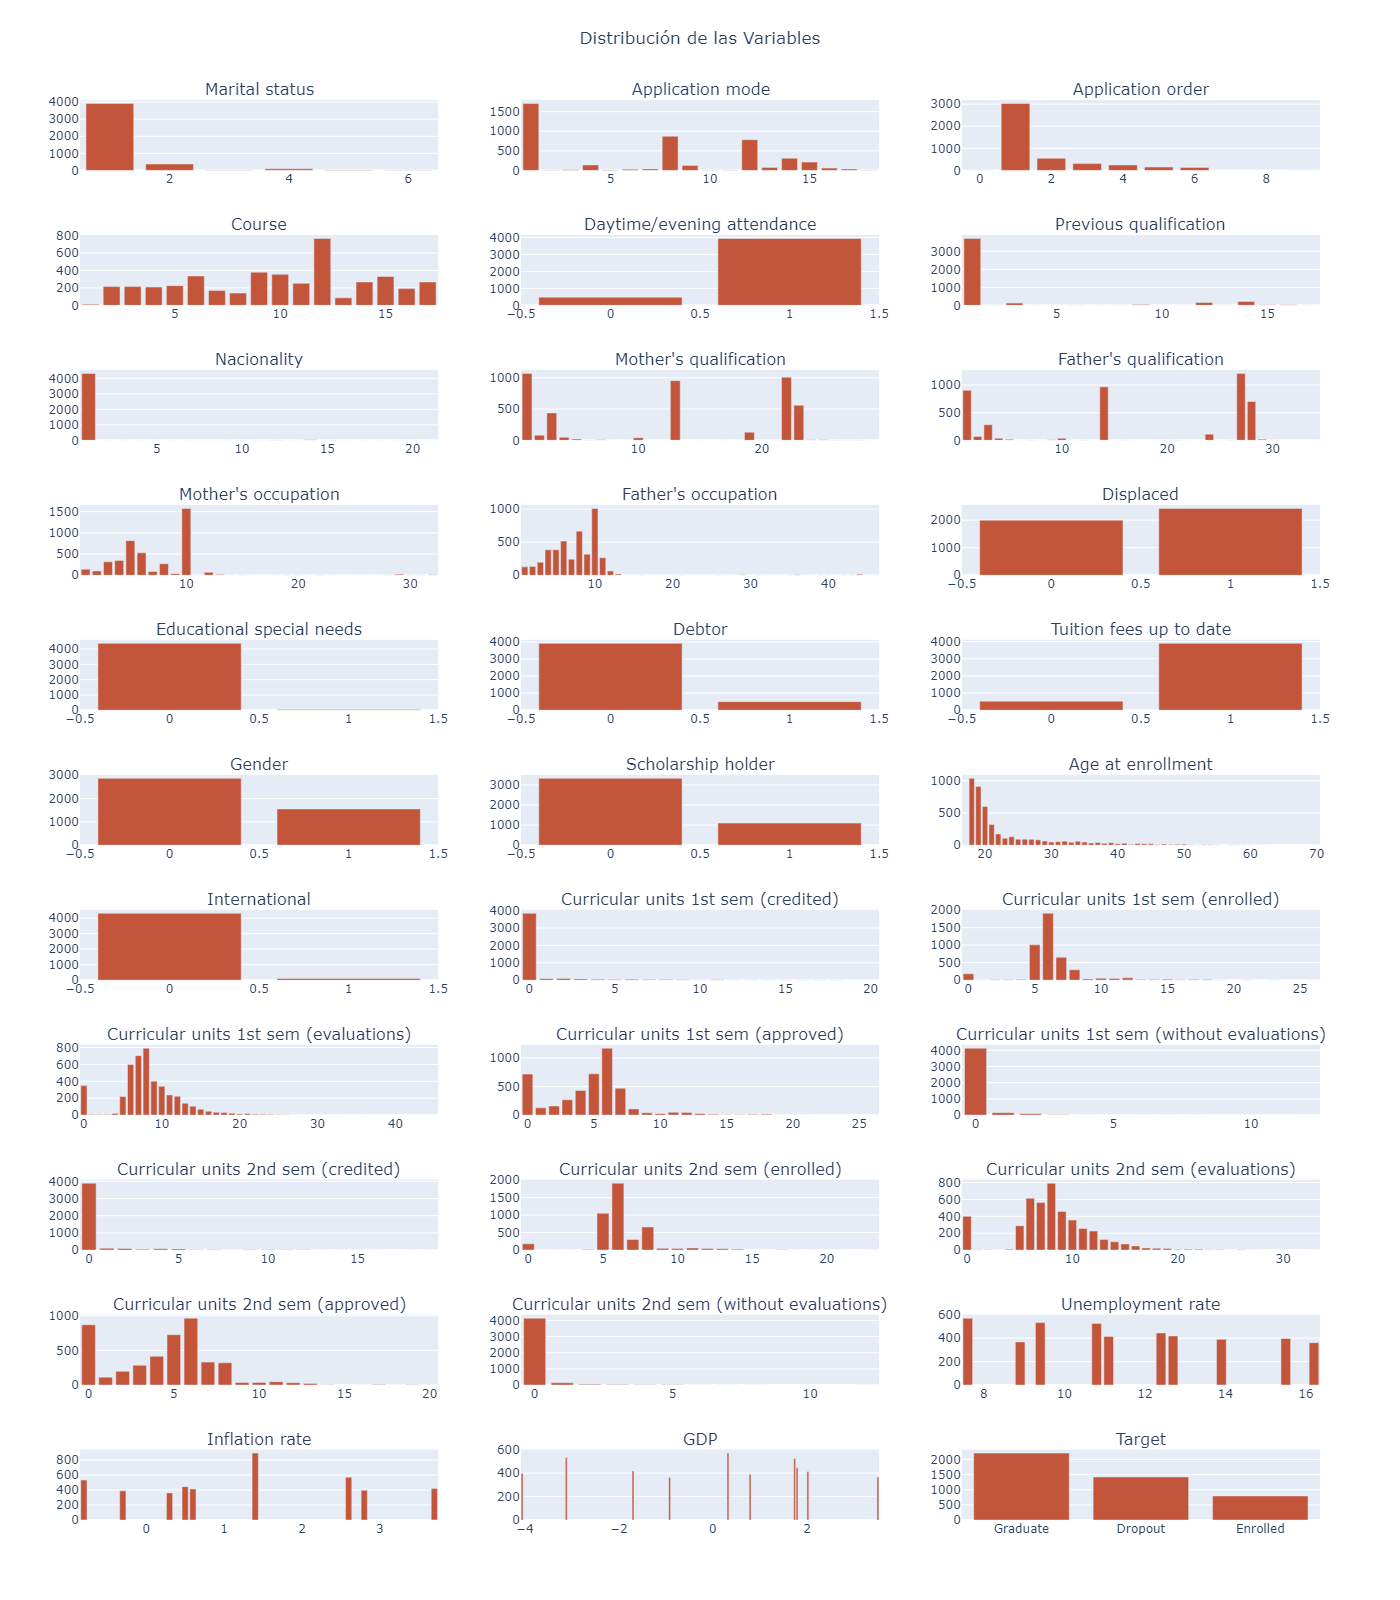

In [17]:
from IPython.display import Image, display

# Mostramos la imagen del gráfico
display(Image(filename='DV.png'))


De los gráficos en barras por cada variable, se puede mencionar lo siguiente:
- Marital Status: La mayoría de los estudiantes son solteros (código 1), mientras que otros estados civiles aparecen en menor frecuencia.
- Application Mode: La modalidad de aplicación más común es la de 1era fase, tiene una frecuencia destacada, con otras modalidades menos comunes.
- Application Order: La mayoría de los estudiantes aplicaron en el intento 1 y 2, pocos aplicantes en intentos posteriores.
- Course: Hay varios cursos, algunos más populares que otros, destacándose especialmente el 12 con una alta frecuencia de estudiantes, siguiéndole el curso 9.
- Daytime/Evening Attendance: La mayoría de los estudiantes asisten en horario de diurno (código 1).
- Previous Qualification: La mayoría de estudiantes tiene educación secundaria (código 1).
- Nationality: La gran mayoría de los estudiantes tienen la nacionalidad portuguesa (código 1).
- Mother’s Qualification: La mayoría de las madres tienen educación secundaria (código 1), le siguen las madres con curso técnico-profesional (código 22).
- Father’s Qualification: La mayoría de los padres tienen 2º ciclo del curso general de secundaria (código 27), le siguen los padres con 10º año de escolaridad (código 14).
- Mother’s Occupation: La mayoría de las madres son profesiones de las Fuerzas Armadas (código 10).
- Father’s Occupation: La mayoría de los padres son profesiones de las Fuerzas Armadas (código 10).
- Displaced: La población estudiantil se divide casi igualmente entre estudiantes desplazados y no desplazados, predominando los desplazados (código 1).
- Educational Special Needs: La gran mayoría de los estudiantes no tienen necesidades especiales (código 0), con pocos que sí las tienen.
- Debtor: La mayoría de los estudiantes no tienen deudas (código 0).
- Tuition Fees Up to Date: La mayoría de los estudiantes están al día en el pago de las matrículas (código 1), y un pequeño grupo no lo está.
- Gender: Hay una mayor proporción de estudiantes mujeres (código 0) en comparación con los hombres (código 1).
- Scholarship Holder: La mayoría de los estudiantes no tienen beca (código 0), mientras que una menor proporción sí cuenta con una beca (código 1).
- Age at Enrollment: La distribución de edad en el momento de la inscripción muestra una concentración de estudiantes en sus primeros 20 años, con pocos estudiantes de mayor edad.
- International: La mayoría de los estudiantes no son internacionales (código 0), mientras que una minoría representa a estudiantes internacionales (código 1).
- Curricular Units 1st Semester (Credited): La mayoría de los estudiantes no tienen unidades curriculares acreditadas en el primer semestre, con muy pocos estudiantes que tienen algunas acreditaciones.
- Curricular Units 1st Semester (Enrolled): La mayoría de los estudiantes están inscritos en un rango de 5 a 10 unidades curriculares en el primer semestre.
- Curricular Units 1st Semester (Evaluations): La mayoría de los estudiantes tienen notas en sus evaluaciones en un rango de 5 a 17 en el primer semestre.
- Curricular Units 1st Semester (Approved): La distribución de unidades curriculares aprobadas en el primer semestre muestra una mayor frecuencia de estudiantes con alrededor de 0 a 7 aprobaciones, y pocos estudiantes con aprobaciones adicionales.
- Curricular Units 1st Semester (Without Evaluations): La gran mayoría de los estudiantes no tienen unidades curriculares sin evaluaciones en el primer semestre, lo que indica que casi todos los estudiantes tienen evaluaciones para sus unidades.
- Curricular Units 2nd Semester (Credited): Al igual que en el primer semestre, la mayoría de los estudiantes no tienen unidades curriculares acreditadas en el segundo semestre.
- Curricular Units 2nd Semester (Enrolled): La mayoría de los estudiantes están inscritos en un rango de 5 a 8 unidades curriculares en el segundo semestre.
- Curricular Units 2nd Semester (Evaluations): La mayoría de los estudiantes tienen notas en sus evaluaciones en un rango de 5 a 16 en el primer semestre.
- Curricular Units 2nd Semester (Approved): La distribución de unidades curriculares aprobadas en el segundo semestre muestra una mayor frecuencia de estudiantes con alrededor de 0 a 8 aprobaciones, y pocos estudiantes con aprobaciones adicionales.
- Curricular Units 2nd Semester (Without Evaluations): La gran mayoría de los estudiantes no tienen unidades curriculares sin evaluaciones en el segundo semestre, indicando que casi todos reciben evaluaciones en sus unidades.
- Unemployment Rate: La mayoría de estudiantes tiene una tasa de desempelo 0, la distribución de estudiantes según la tasa de desempleo cuenta con algunos picos notables en tasas específicas.
- Inflation Rate: La tasa de inflación varía, con varios picos en diferentes valores, lo que sugiere diferentes niveles de inflación que pueden estar afectando a los estudiantes o sus entornos; la tasa de inflación que más se repite es la de 1.4.
- GDP (Producto Interno Bruto): La distribución muestra diferentes valores de PIB, algunos de los cuales son negativos y otros positivos, lo que refleja el contexto económico general que rodea a los estudiantes, teniendo relación directa con la inflación.
- Target: La variable objetivo muestra la distribución de los estudiantes entre tres categorías: graduados, desertores y estudiantes actualmente inscritos, siendo la categoría de graduados la más numerosa, seguida de desertores y luego de estudiantes inscritos.

In [18]:
# Graficaremos la dispersión de las variables excluidas anteriormente por tener decimales para observar su comportamiento.
# Creamos una figura con dos subgráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=["Curricular Units 1st Sem (Grade)", "Curricular Units 2nd Sem (Grade)"])

# Gráficamos la dispersión para "Curricular units 1st sem (grade)"
trace1 = go.Scatter(
    x=data["Curricular units 1st sem (grade)"], 
    y=data.index, 
    mode='markers', 
    marker=dict(color='#C3553A'),
    name="1st Sem (Grade)"
)
fig.add_trace(trace1, row=1, col=1)

# Gráficamos la dispersión para "Curricular units 2nd sem (grade)"
trace2 = go.Scatter(
    x=data["Curricular units 2nd sem (grade)"], 
    y=data.index, 
    mode='markers', 
    marker=dict(color='#C3553A'),
    name="2nd Sem (Grade)"
)
fig.add_trace(trace2, row=1, col=2)

# Ajustamos el diseño
fig.update_layout(
    height=500, 
    width=1000,  
    title_text="Dispersión de las Variables de Calificaciones",
    showlegend=False, 
    title_x=0.5,
    title_y=0.95,
)

# Actualizamos los ejes
fig.update_xaxes(title_text="Valor", row=1, col=1)
fig.update_yaxes(title_text="Índice", row=1, col=1)
fig.update_xaxes(title_text="Valor", row=1, col=2)
fig.update_yaxes(title_text="Índice", row=1, col=2)

# Mostramos la figura
fig.show()


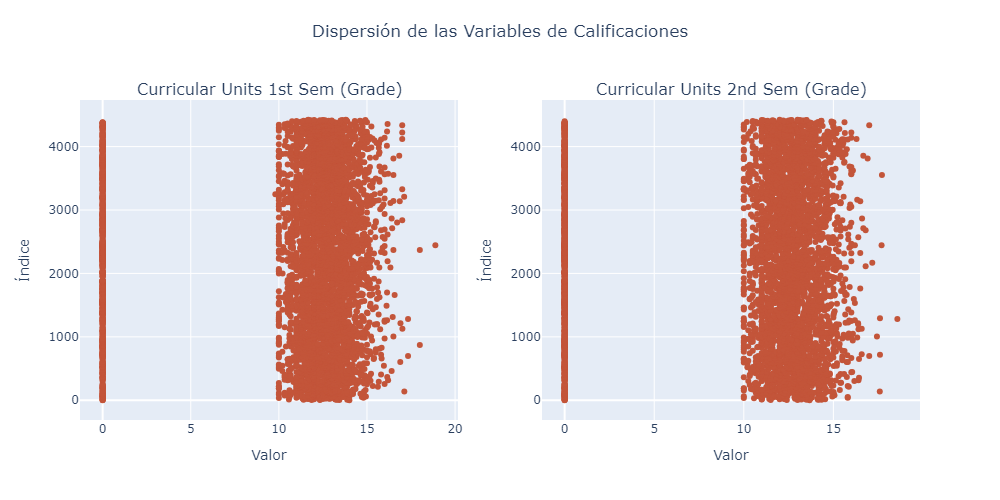

In [19]:
from IPython.display import Image, display

# Mostramos la imagen del gráfico
display(Image(filename='VN.png'))

De los gráficos de dispersiones por notas presentados, se puede mencionar:
- Curricular Units 1st Sem (Grade): La mayoría de las calificaciones están concentradas entre los valores de 10 y 15, lo cual indica que los estudiantes tienden a obtener calificaciones en este rango. También hay una variación considerable en las calificaciones, con algunos valores más altos y otros más bajos distribuidos de forma esparcida.
- Curricular Units 2nd Sem (Grade): Similar al primer gráfico. La concentración principal también está en el rango de 10 a 15, lo que sugiere que los estudiantes mantienen un desempeño similar entre ambos semestres. Al igual que en el primer semestre, existen variaciones con calificaciones fuera del rango promedio.

In [20]:
# Hacemos una matriz de correlaciones para observar si hay relaciones entre variables
# Excluir la columna "Target" y seleccionar solo las variables numéricas
numerical_data = data.drop(columns=['Target', 'ID']).select_dtypes(include=np.number)

# Calculamos la matriz de correlación
correlation_matrix = numerical_data.corr()

# Creamos la figura con la matriz de correlación como un heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values, 
    x=correlation_matrix.columns, 
    y=correlation_matrix.columns,  
    colorscale='RdBu',  
    zmin=-1, zmax=1, 
    colorbar=dict(title="Correlación"), 
))

# Configuramos la figura
fig.update_layout(
    title="Matriz de Correlación",
    xaxis_title="Variables",
    yaxis_title="Variables",
    xaxis=dict(tickangle=45), 
    yaxis=dict(tickangle=0),
    height=1000,
    width=1000,
)

# Mostramos la figura
fig.show()


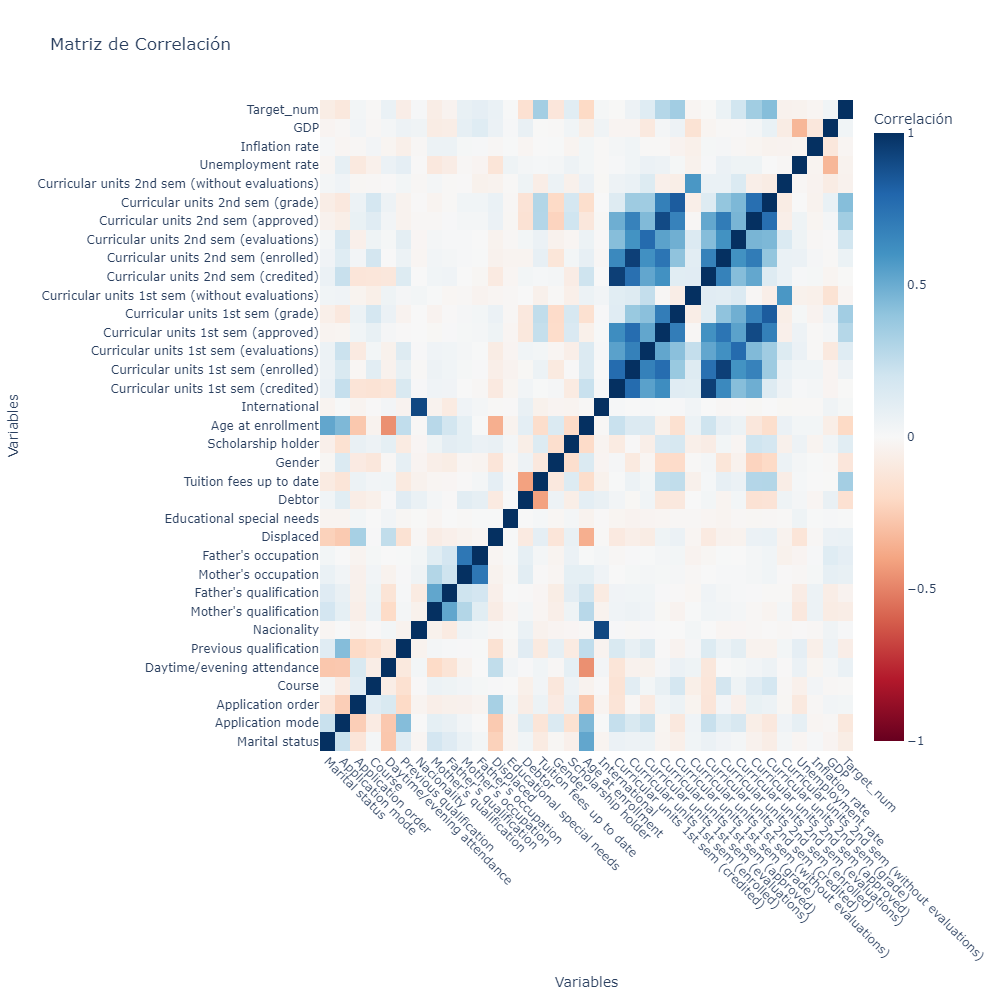

In [21]:
from IPython.display import Image, display

# Mostramos la imagen del gráfico
display(Image(filename='MC.png'))

De la matriz de correlación se pueden obtener los siguientes insights:
- Las variables relacionadas con unidades curriculares (enrolled, approved, evaluations, credited) en el primer y segundo semestre muestran fuertes correlaciones positivas entre sí. Esto sugiere que los estudiantes que están inscritos en más unidades en un semestre también tienden a estar inscritos en más unidades en el otro semestre, y es probable que el número de evaluaciones, créditos y aprobaciones esté relacionado entre sí.
- Las variables tasa de desempleo, GDP e inflación no muestran correlaciones fuertes con otras variables académicas. Esto sugiere que las condiciones económicas generales pueden no estar directamente relacionadas con el desempeño académico de estos estudiantes.
- La edad al inscribirse tiene una ligera correlación negativa con las variables cantidad de unidades inscritas y aprobadas. Esto podría indicar que los estudiantes de mayor edad suelen inscribirse en menos unidades curriculares o tienen un desempeño diferente en términos de créditos y aprobaciones en comparación con los estudiantes más jóvenes.
- La condición de becado muestra poca correlación con las métricas académicas, lo que sugiere que estos factores no tienen una relación directa fuerte con el número de créditos, evaluaciones o aprobaciones de los estudiantes.
- La variable necesidades educativas especiales tiene una ligera correlación con algunas de las variables académicas, lo cual podría reflejar un impacto en el rendimiento o el tipo de apoyo adicional que estos estudiantes necesitan.

La mayoría de las correlaciones son débiles, lo que indica que muchas de las variables tienen poca o nula relación entre sí. Esto sugiere que el rendimiento académico de los estudiantes depende más de factores internos del sistema educativo que de factores externos, como condiciones económicas o características familiares.

### Target
Analicemos la variable "Target" que la convertimos en numérica "Target_num" para saber qué variables tiene mayor correlación con esta:

- Age at enrollment: Tiene una correlación positiva con Target_num. Esto podría sugerir que los estudiantes de mayor edad tienen más probabilidad de estar en categorías como "enrolled" en lugar de "dropout". La edad puede ser un factor importante para entender la probabilidad de deserción o continuidad en el estudio.

- Curricular Units (enrolled): Las variables de ambos semestres muestran una ligera correlación con Target_num. Esto sugiere que el número de unidades inscritas o aprobadas podría estar relacionado con el estado de los estudiantes en términos de graduación, deserción o continuación.

- Scholarship Holder: Existe una ligera correlación con Target_num. Indicando que los estudiantes con beca podrían tener una mayor probabilidad de continuar sus estudios y alcanzar la graduación, en comparación con aquellos sin beca, que podrían estar en mayor riesgo de deserción.

- Unemployment Rate: Tiene una correlación leve con Target_num, lo que podría indicar que el contexto económico afecta de alguna forma la probabilidad de que los estudiantes continúen o abandonen sus estudios.

- Género: Existe una ligera correlación con Target_num, lo que sugiere que el género podría influir en la probabilidad de desertar, graduarse o continuar inscrito. Esto podría interpretarse como una diferencia en el comportamiento o necesidades entre géneros en relación con el logro educativo.

In [22]:
# Realizamos gráficos de violines para observar si tenemos algún outlier
# Filtrar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns[:36]

# Creamos una figura en Plotly con subgráficas
fig = make_subplots(
    rows=9, cols=4, 
    subplot_titles=numeric_columns, 
    shared_yaxes=True,
    vertical_spacing=0.05
)

# Creamos gráficos de violín horizontales para cada columna numérica
for i, col in enumerate(numeric_columns):
    row = i // 4 + 1  
    col_pos = i % 4 + 1  
    
    fig.add_trace(go.Violin(
        x=data[col].dropna(),  
        box_visible=True, 
        line_color='#1C5C9E',
        name=col,
        orientation='h'  
    ), row=row, col=col_pos)

    # Establecemos el rango del eje X para cada gráfico de violín de manera independiente
    fig.update_xaxes(
        range=[data[col].min(), data[col].max()],
        row=row, col=col_pos 
    )
    
    # Eliminamos el título del eje Y en cada subplot
    fig.update_yaxes(
        showticklabels=False, 
        row=row, col=col_pos  
    )

# Actualizamos la disposición y el título de la figura
fig.update_layout(
    title="Distribución de las Variables Numéricas (Gráficos de Violín)",
    showlegend=False,
    height=1700, 
    width=1400,  
)

# Mostramos la figura
fig.show()


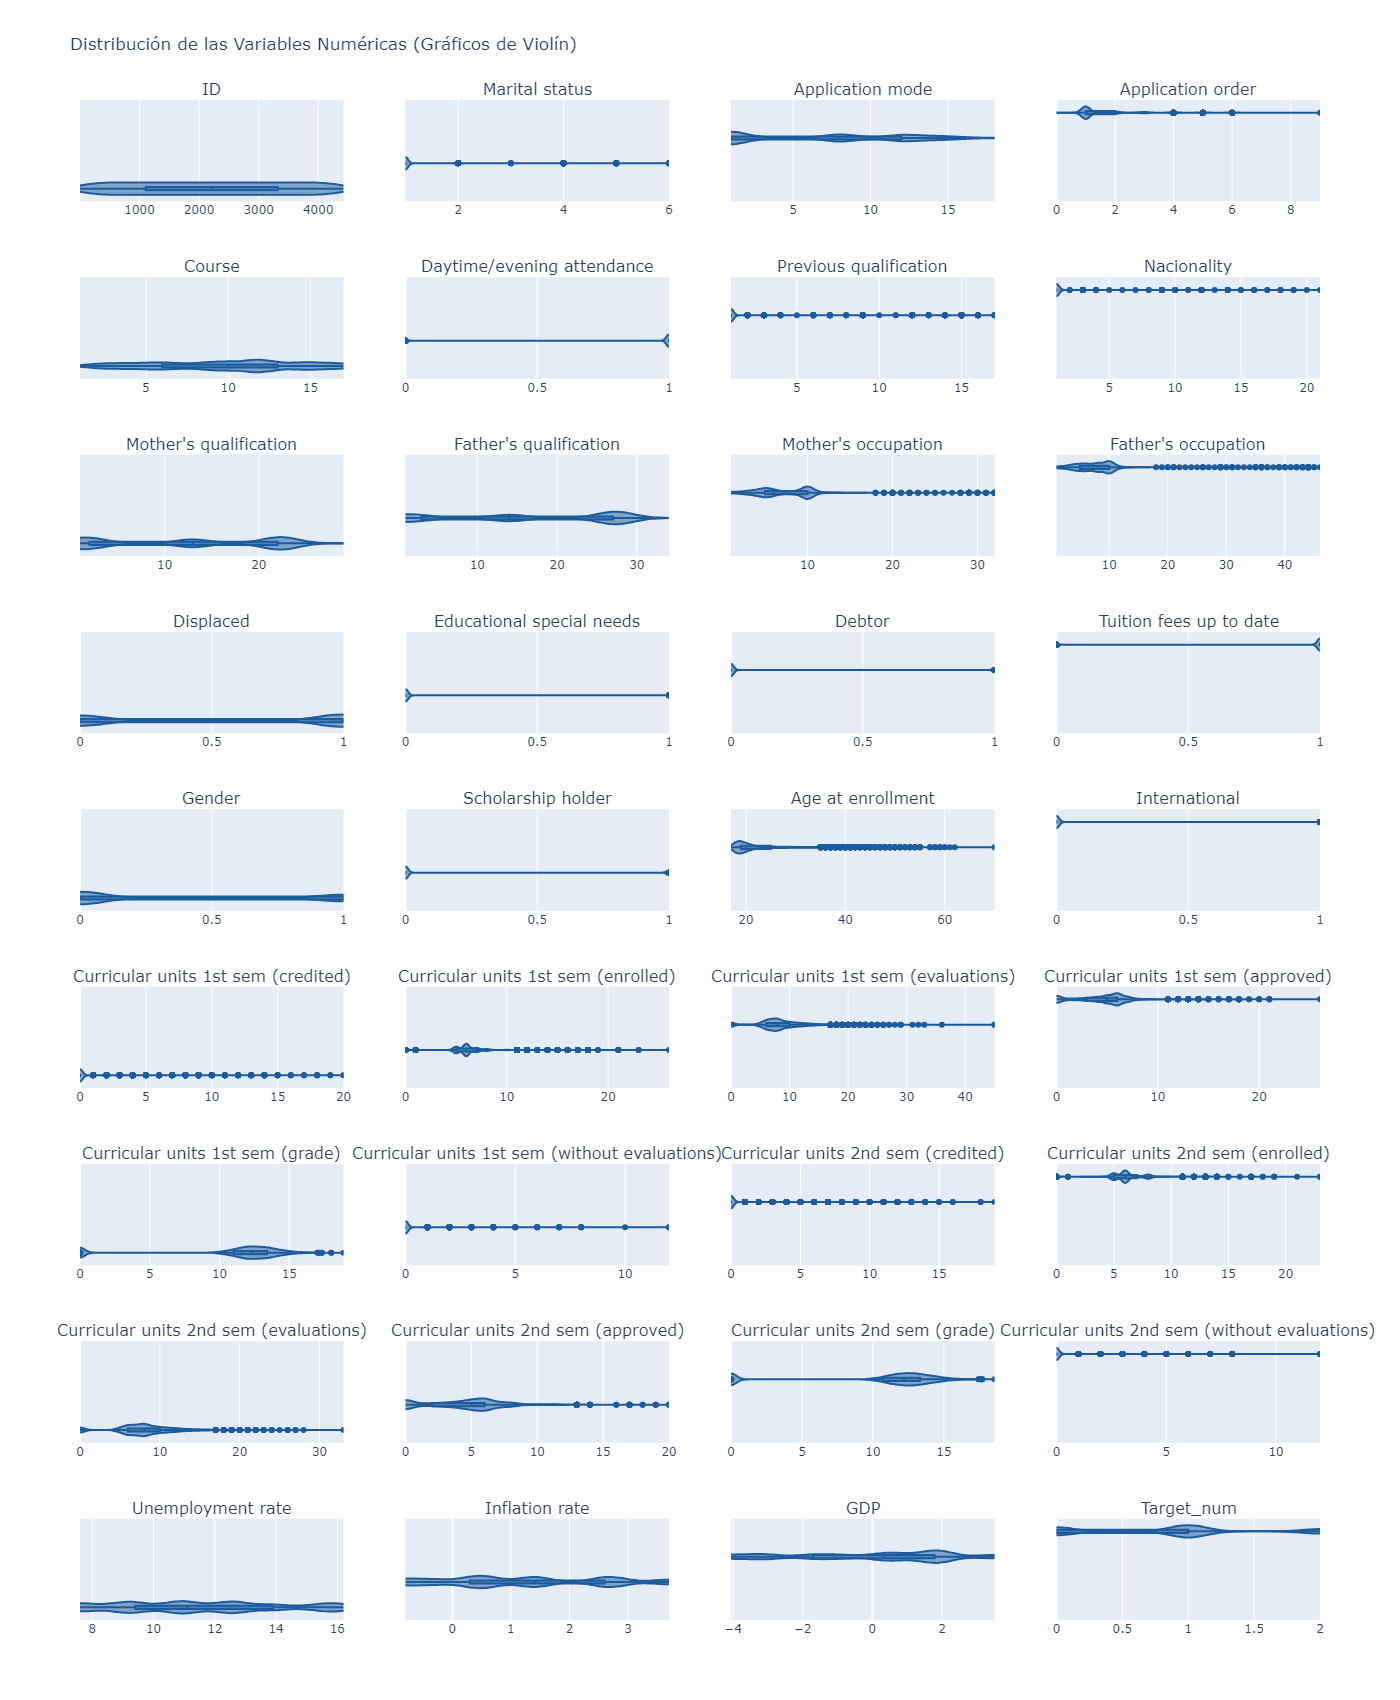

In [23]:
from IPython.display import Image, display

# Mostramos la imagen del gráfico
display(Image(filename='DVN.png'))


De los gráficos de violines por cada variable numérica, se puede comentar lo siguiente acerca de los outliers:
- Marital Status: Hay algunos outliers que corresponden a estados civiles poco comunes entre los estudiantes. La mayoría tiene un estado civil dominante que es soltero.
- Application Mode: La distribución muestra varios outliers en ciertos modos de aplicación. Esto sugiere que algunos modos de aplicación son inusuales, pero aún son elegidos por algunos estudiantes.
- Application Order: Existen outliers en los valores superiores de orden de aplicación, lo que indica que unos pocos estudiantes han aplicado en múltiples intentos para ingresar, aunque la mayoría lo hace en el primer o segundo intento.
- Course: Los cursos tienen algunos outliers en términos de popularidad. Mientras que la mayoría de los estudiantes están concentrados en ciertos cursos, hay algunos cursos con pocos estudiantes inscritos.
- Daytime/Evening Attendance: La variable es binaria, por lo que no hay outliers evidentes.
- Previous Qualification: Hay algunos outliers en las calificaciones, lo que indica hay una dispersión de datos en las calificaciones.
- Nationality: Hay algunos outliers en nacionalidades, lo que indica que la mayoría de los estudiantes pertenecen a una nacionalidad predominante.
- Mother's Qualification: Existen algunos outliers en niveles altos o bajos de calificación de la madre, sugiriendo que, aunque la mayoría de las madres tienen ciertos niveles educativos comunes, hay excepciones en ambos extremos de la escala.
- Father's Qualification: Similar a las calificaciones de las madres, se observan outliers en niveles de calificación extremos. Esto indica que unos pocos padres tienen niveles de calificación mucho más altos o más bajos que la mayoría.
- Mother's Occupation: Algunos outliers están presentes en ocupaciones específicas que son menos comunes. Esto sugiere que, aunque ciertas ocupaciones son típicas, algunas madres tienen profesiones inusuales.
- Father's Occupation: Al igual que en la ocupación de las madres, se observan outliers en ocupaciones inusuales. La mayoría de los padres se concentran en ciertas ocupaciones, pero algunos tienen trabajos que son poco comunes.
- Displaced: La variable es binaria, por lo que no hay outliers evidentes.
- Educational Special Needs: La variable es binaria, por lo que no hay outliers evidentes.
- Debtor: La variable es binaria, por lo que no hay outliers evidentes.
- Tuition Fees Up to Date: La variable es binaria, por lo que no hay outliers evidentes.
- Gender: La variable es binaria, por lo que no hay outliers evidentes.
- Scholarship Holder: La variable es binaria, por lo que no hay outliers evidentes.
- Age at Enrollment: La mayoría de los estudiantes se inscriben en edades que están entre los 18 y 30 años. Hay algunos outliers en edades superiores a 40, lo que sugiere que algunos estudiantes se inscriben a edades más avanzadas de manera poco frecuente.
- International: La variable es binaria, por lo que no hay outliers evidentes.
- Curricular Units 1st Sem (Credited): La mayoría de los estudiantes tienen una cantidad limitada de créditos en el primer semestre, pero hay algunos estudiantes que obtienen créditos más altos, lo que se observa como outliers.
- Curricular Units 1st Sem (Enrolled): La mayoría de los estudiantes están inscritos en un número moderado de unidades en el primer semestre, pero hay algunos outliers que están inscritos en una cantidad significativamente mayor.
- Curricular Units 1st Sem (Evaluations): La mayoría de los estudiantes tienen entre 5 y 15 evaluaciones, pero hay algunos outliers que presentan un número de evaluaciones mucho mayor, indicando una carga académica inusual.
- Curricular Units 1st Sem (Approved): La mayoría de los estudiantes aprueban un número moderado de unidades, pero algunos outliers tienen aprobaciones significativamente más altas, lo cual es inusual.
- Curricular Units 1st Sem (Grade): La distribución de calificaciones muestra que la mayoría están en un rango de 10 a 15, pero algunos outliers tienen calificaciones fuera de este rango, lo que sugiere casos atípicos de rendimiento académico muy bajo o muy alto.
- Curricular Units 1st Sem (Without Evaluations): La mayoría de los estudiantes no tienen unidades sin evaluación, pero algunos outliers tienen varias unidades sin evaluación, lo cual podría deberse a circunstancias especiales.
- Curricular Units 2nd Sem (Credited): Similar al primer semestre, la mayoría de los estudiantes obtienen una cantidad de créditos moderada, pero algunos outliers tienen créditos significativamente mayores.
- Curricular Units 2nd Sem (Enrolled): La mayoría de los estudiantes están inscritos en un número moderado de unidades, pero hay outliers que muestran una inscripción en un número elevado de unidades, lo cual no es común.
- Curricular Units 2nd Sem (Evaluations): Tiene algunos outliers con más de 20 evaluaciones, lo que sugiere que ciertos estudiantes enfrentan una carga académica significativamente mayor que el promedio.
- Curricular Units 2nd Sem (Approved): Cuenta con algunos outliers que aprueban más de 15 unidades. Estos estudiantes tienen un desempeño destacado en términos de aprobaciones.
- Curricular Units 2nd Sem (Grade): Hay algunos outliers en ambos extremos, indicando estudiantes con calificaciones excepcionalmente bajas o altas en el segundo semestre.
- Curricular Units 2nd Sem (Without Evaluations): La variable tiene algunos outliers con varias unidades sin evaluación. Esto podría reflejar casos especiales en los que algunos estudiantes no completan evaluaciones en ciertas unidades.
- Unemployment Rate: Cuenta con algunos outliers en los extremos más altos. Esto sugiere que algunos estudiantes tienen condiciones de empleo inusuales, lo cual podría afectar indirectamente su situación académica.
- Inflation Rate: Tiene algunos outliers en valores más altos y más bajos. Esto refleja las variaciones en el contexto económico que podrían afectar a los estudiantes en diferentes grados.
- GDP: La mayoría de los valores del PBI están concentrados cerca de cero, lo que indica un crecimiento económico estable en general, pero hay algunos outliers tanto en el lado positivo como negativo.
- Target_num: No muestra outliers significativos, dado que es una variable categórica.

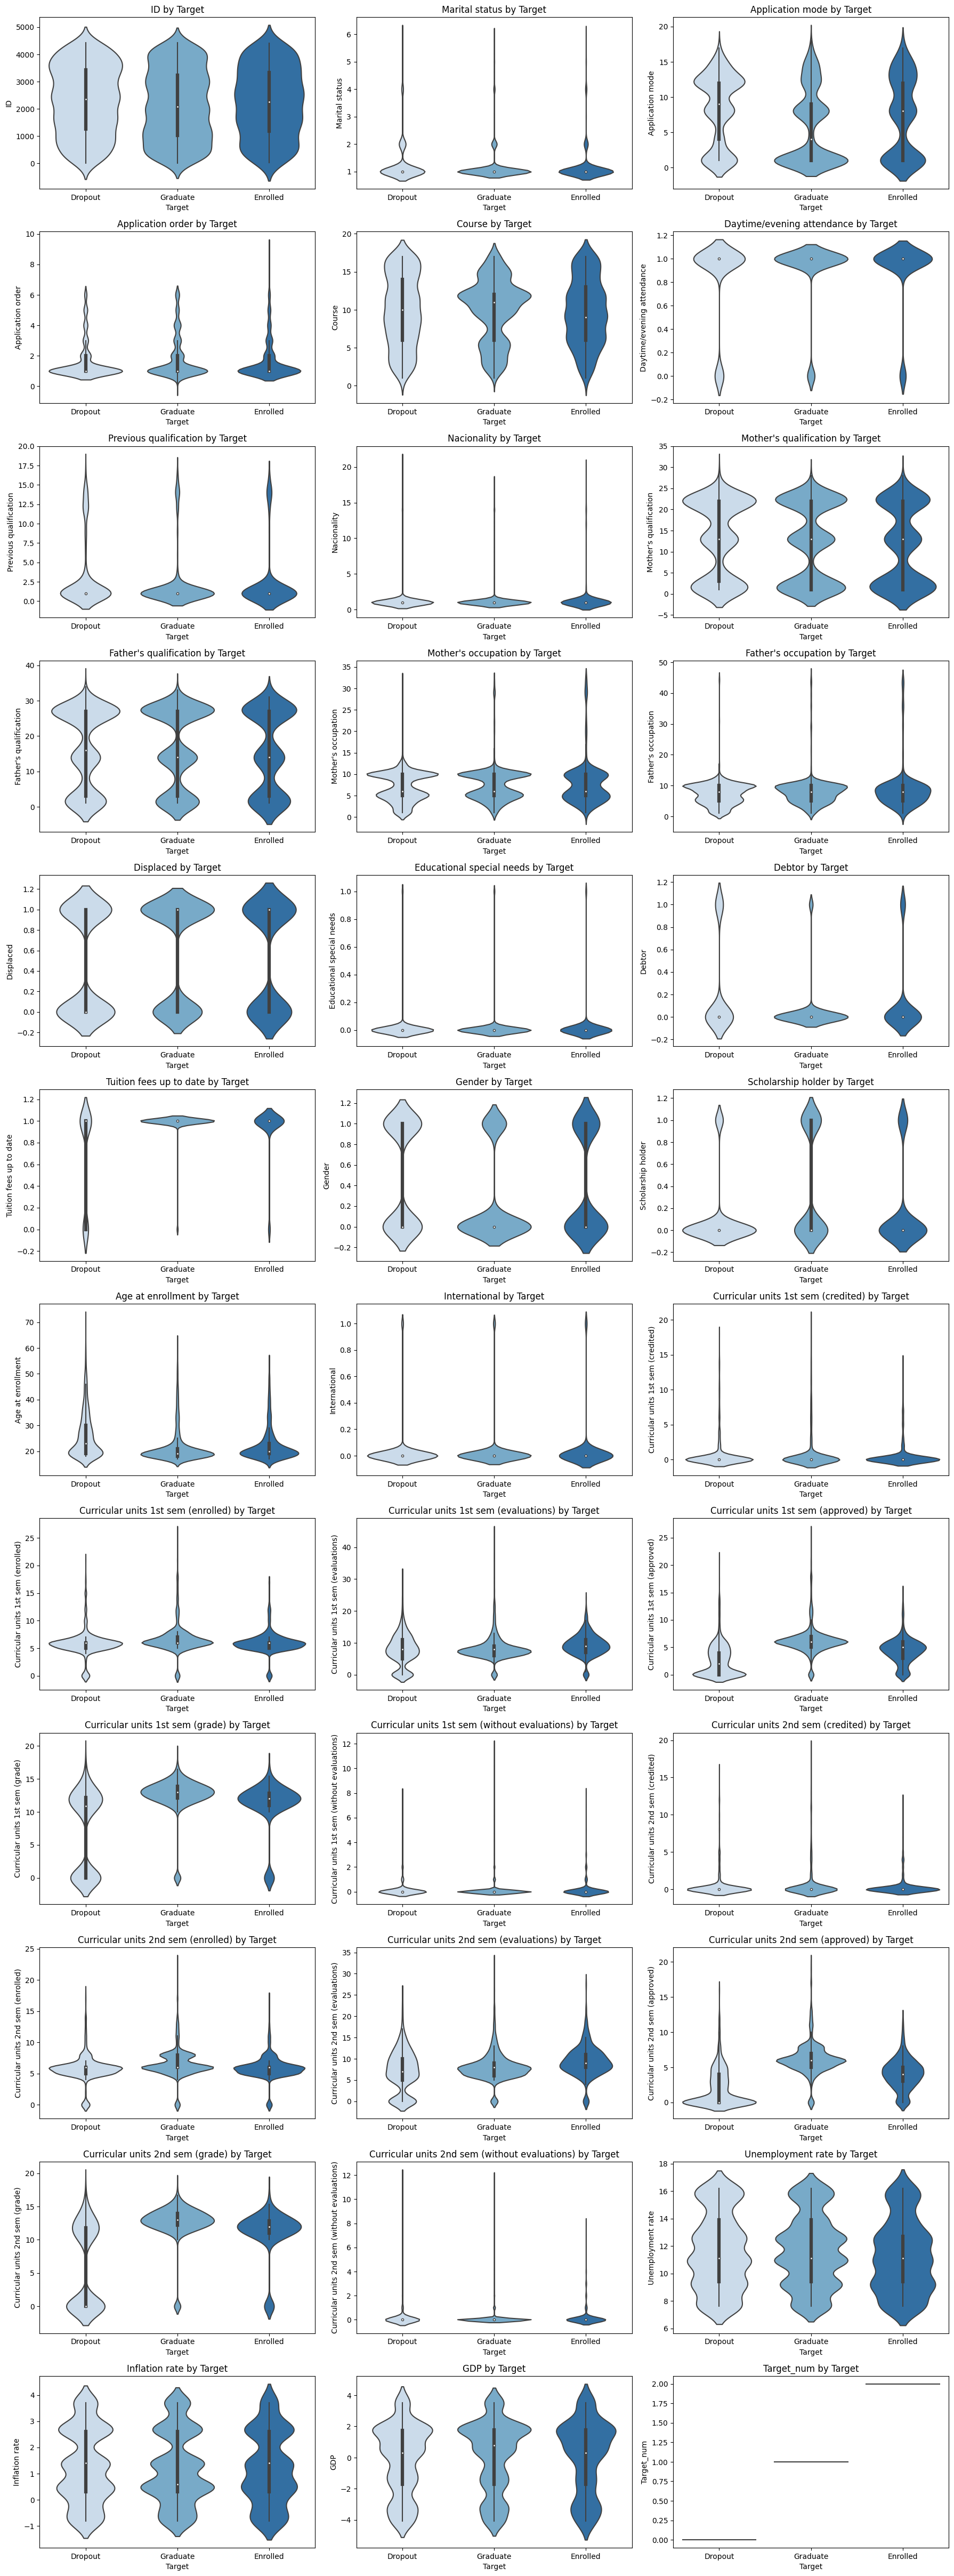

In [24]:
# Realizamos gráficos de violines distinguiendo por los valores únicos de la variable "Target" para observar su dispersión y si tenemos algún outlier
# Filtramos solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Configuramos el gráfico
num_plots = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(18, 4 * ((num_plots // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    sns.violinplot(x='Target', y=col, data=data, ax=ax, palette='Blues')
    ax.set_title(f'{col} by Target')
    ax.set_xlabel('Target')
    ax.set_ylabel(col)

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Se dividieron las variables de acuerdo a las categorías de la variable "Target" para saber si hay algún impacto importante a considerar:
- Marital Status: La mayoría de los estudiantes son solteros, aunque hay algunos outliers en Graduate y Enrolled con otros estados civiles.
- Application Mode: Los modos de aplicación están distribuidos de forma similar entre las categorías de Target.
- Application Order: Hay más variación en Enrolled, con algunos estudiantes aplicando varias veces antes de ser admitidos, lo cual podría indicar persistencia entre aquellos que permanecen inscritos.
- Course: Dropout y Graduate muestran concentraciones en ciertos cursos, mientras que Enrolled tiene una distribución más amplia, lo que podría reflejar una mayor variedad de estudios entre los que continúan inscritos.
- Daytime/Evening Attendance: La mayoría de los estudiantes en todas las categorías asisten en el horario diurno. Los pocos que asisten en horarios alternativos son más frecuentes en Dropout.
- Previous Qualification: Las calificaciones previas son similares entre todas las categorías.
- Nationality: La mayoría de los estudiantes comparten una nacionalidad principal en todas las categorías de Target.
- Mother's Qualification y Father's Qualification: Ambas variables muestran una distribución uniforme entre las categorías.
- Mother's Occupation y Father's Occupation: No se observan patrones diferenciados en ocupaciones de los padres entre las categorías de Target.
- Displaced: La mayoría de los estudiantes no son desplazados en las tres categorías, pero hay unos pocos casos en Graduate y Enrolled, indicando que el desplazamiento no parece afectar considerablemente el estado académico.
-Educational Special Needs: Aunque la mayoría de los estudiantes no tienen necesidades especiales, hay algunos casos en todas las categorías, sin una tendencia clara hacia una categoría de Target específica.
- Debtor: Tiene algunos outliers en Dropout, lo que sugiere que los estudiantes con deuda podrían estar ligeramente más propensos a la deserción.
- Tuition Fees Up to Date: Los estudiantes que no están al día con sus pagos aparecen como outliers en Dropout, lo que podría indicar que el no estar al día en los pagos está asociado con una mayor probabilidad de deserción.
- Gender: La distribución por género es similar entre todas las categorías.
- Scholarship Holder: Los que tienen becas aparecen en Graduate y Enrolled, lo que podría sugerir que el tener una beca está asociado con una mayor probabilidad de continuar o graduarse.
- Age at Enrollment: Hay una mayor concentración de estudiantes jóvenes en Graduate y Enrolled, mientras que algunos estudiantes de mayor edad aparecen en Dropout, lo cual podría sugerir que la edad al ingresar está levemente relacionada con la probabilidad de graduación o continuación.
- International: No hay relación clara entre ser internacional y el estado de Target.
- Curricular Units (1st y 2nd Semester): Enrolled y Graduate tienen más unidades inscritas, evaluadas, y aprobadas en ambos semestres, mientras que Dropout tiene menos unidades, lo cual sugiere que una carga académica más alta puede estar asociada con la continuidad y la graduación. Los estudiantes con unidades sin evaluación son más comunes en Dropout, lo cual podría indicar un menor compromiso académico.

- Unemployment Rate, Inflation Rate, GDP: Estas variables económicas tienen distribuciones similares entre las tres categorías de Target, lo que sugiere que el contexto económico no tiene un impacto claro en la probabilidad de deserción, graduación o inscripción continua.


In [25]:
# De la matriz de correlaciones, obtuvimos las variables directamente relacionadas con la variablle "Target". A continuación veremos el detalle de estas para un mejor entendimiento.
# Creamos subgráficas
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=[
        'Age at enrollment by Target',
        'Curricular units 1st sem (enrolled) by Target',
        'Curricular units 2nd sem (enrolled) by Target',
        'Scholarship holder by Target',
        'Unemployment rate by Target',
        'Gender by Target'
    ],
    horizontal_spacing=0.15,  
    vertical_spacing=0.2  
)

# Hacemos la función para crear histogramas y agregar trazos
def add_histogram(fig, data, x, row, col, include_legend=True):
    fig_temp = px.histogram(
        data, x=x, color='Target', labels={x: x, 'count': 'Count'},
        color_discrete_sequence=['#C3553A', '#1C5C9E', '#78AAC8'] 
    )
    fig_temp.update_layout(barmode='stack')
    
    for trace in fig_temp.data:
        trace.legendgroup = trace.name  
        trace.showlegend = include_legend  
        fig.add_trace(trace, row=row, col=col)


add_histogram(fig, data, 'Age at enrollment', 1, 1, include_legend=True)
add_histogram(fig, data, 'Curricular units 1st sem (enrolled)', 1, 2, include_legend=False)
add_histogram(fig, data, 'Curricular units 2nd sem (enrolled)', 1, 3, include_legend=False)
add_histogram(fig, data, 'Scholarship holder', 2, 1, include_legend=False)
add_histogram(fig, data, 'Unemployment rate', 2, 2, include_legend=False)
add_histogram(fig, data, 'Gender', 2, 3, include_legend=False)

# Actualizamos la disposición del layout
fig.update_layout(
    title_text="Variables directamente relacionadas con la variable Target",
    height=700,
    showlegend=True, 
    legend_title="Target", 
    legend=dict(
        x=1,  
        y=0.5,  
        traceorder="normal", 
        orientation="v"
    )
)

# Mostramos la figura
fig.show()


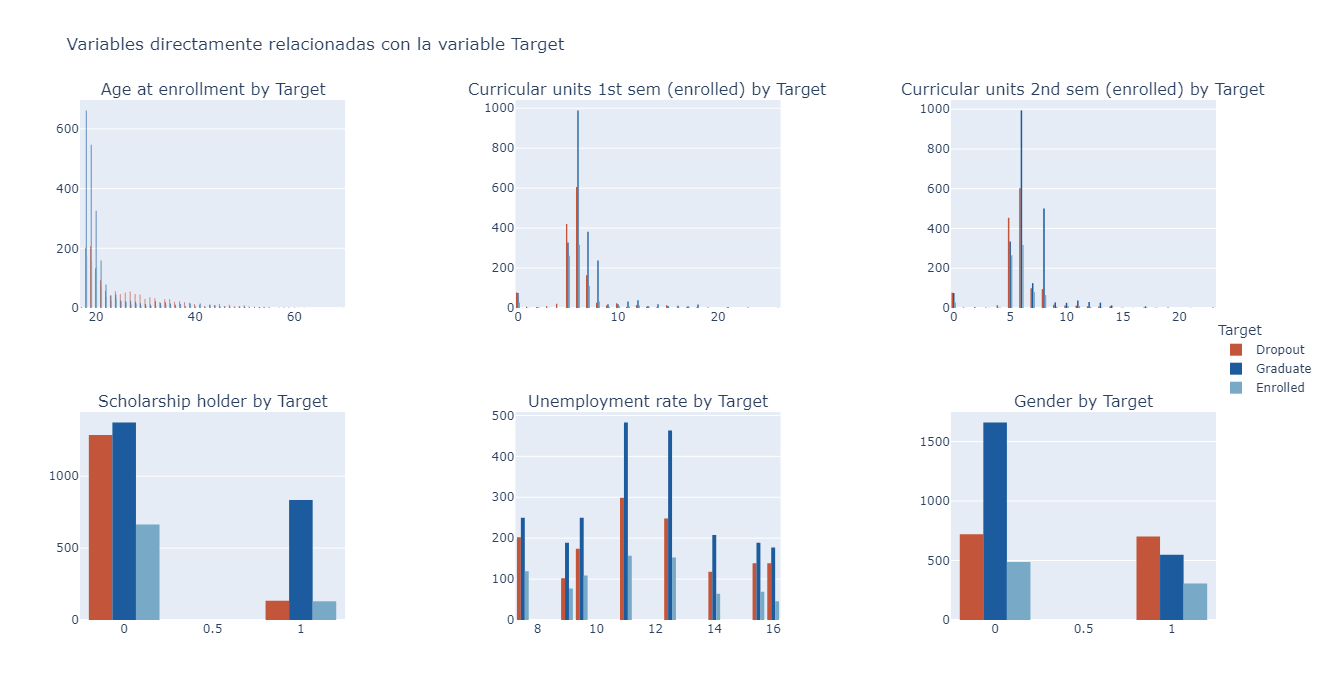

In [26]:
from IPython.display import Image, display

# Mostrar la imagen
display(Image(filename='VCT.png'))

De las variables relacioanadas directamente con "Target" se puede comentar lo siguiente:
- Age at Enrollment by Target: Los estudiantes que desertan (Dropout) suelen inscribirse a una edad más avanzada en comparación con los que se gradúan (Graduate) o están actualmente inscritos (Enrolled), quienes en su mayoría se inscriben a una edad temprana, concentrados alrededor de los 18-20 años. Esto sugiere que la edad al momento de la inscripción podría ser un factor de riesgo para la deserción, posiblemente debido al menos tiempo disponible para dedicarse a los estudios.
- Curricular Units 1st Sem (Enrolled) by Target: Los estudiantes Graduate y Enrolled tienen una mayor concentración de unidades inscritas en el primer semestre en comparación con los Dropout. Esto podría indicar que los estudiantes que tienden a abandonar suelen inscribirse en menos asignaturas desde el principio, quizás reflejando una menor intención o capacidad para comprometerse con la carga académica completa.
- Curricular Units 2nd Sem (Enrolled) by Target: La tendencia es similar a la del primer semestre, con Graduate y Enrolled mostrando una mayor cantidad de unidades inscritas en comparación con Dropout. Sin embargo, en el segundo semestre, la diferencia entre Dropout y las otras categorías es aún más marcada. Esto sugiere que los estudiantes que tienen dificultades en el primer semestre y deciden continuar suelen reducir su carga académica o abandonar en el segundo semestre.
- Scholarship Holder by Target: La mayoría de los estudiantes sin beca caen en las categorías Graduate y Enrolled, mientras que aquellos con beca están más representados en Graduate. Esto podría indicar que el apoyo financiero en forma de beca aumenta la probabilidad de graduación. Los estudiantes que no reciben becas pueden enfrentar desafíos financieros que los llevan a deserción o a una menor dedicación a los estudios.
- Unemployment Rate by Target: En las áreas con una tasa de desempleo más alta (cercana al 12-14%), se observa un incremento en los estudiantes Dropout en comparación con Graduate y Enrolled. Esto sugiere que vivir en áreas con altas tasas de desempleo puede influir en la decisión de abandonar los estudios, posiblemente porque los estudiantes en estas áreas necesitan trabajar para ayudar a sus familias o porque enfrentan dificultades económicas.
- Gender by Target: Existe una mayor proporción de Graduate en el género femenino, mientras que en Dropout y Enrolled la distribución es más equilibrada. Esto podría indicar que el género femenino tiene una mayor tendencia a completar los estudios, mientras que el otro tiene una mayor tendencia a abandonar o continuar inscrito sin completar el ciclo.

##### _Observaciones EDA_
- Los estudiantes que se inscriben a una edad más avanzada muestran una tendencia más alta hacia la deserción, lo que podría requerir programas de apoyo específicos para este grupo de edad, como flexibilidad en horarios o cargas académicas adaptadas.
- Los estudiantes que se inscriben en menos unidades en el primer semestre están en mayor riesgo de desertar. Un análisis más profundo podría identificar si una carga inicial baja predice falta de compromiso y si es posible intervenir temprano para ofrecer soporte.
- Los estudiantes en áreas con alto desempleo tienen una tendencia significativa a abandonar, posiblemente debido a la presión económica. Esto indica que el contexto económico local es un factor externo importante y sugiere que las instituciones podrían considerar programas de ayuda para estudiantes de áreas desfavorecidas.
- Uno de los géneros tiene una probabilidad más alta de graduarse, lo que podría reflejar diferencias en el enfoque hacia los estudios, expectativas sociales, o responsabilidades externas. Esto podría invitar a analizar cómo el género influye en el rendimiento y qué tipo de apoyo adicional podría ser útil.

# Modelo

Para obtener el objetivo de este proyecto, se desarrolla un modelo predictivo tomando en cuenta algunas variables del dataframe.
Este modelo predcitivo se desarrolla toamndo lo siguiente:
1. Preparación de los Datos: 
      - Codificación de Variables Categóricas: Convertiremos las variables categóricas en variables numéricas usando una codificación label encoding.
      - División de Datos: Separaremos los datos en conjuntos de 70% entrenamiento y 30% prueba para evaluar el rendimiento del modelo.
2. Selección y Entrenamiento del Modelo: Usamos un modelo de clasificación como Random Forest que es robusto frente a variables categóricas y a datos desequilibrados.
3. Evaluación del Modelo:
      - Métricas de Evaluación: Usaremos métricas como precisión, recall, F1-score y área bajo la curva ROC para medir el rendimiento del modelo.
      - Matriz de Confusión: Se visualiza el desempeño del modelo, mostrando los aciertos y errores de las predicciones en cada clase.
      - Cálculo del AUC-ROC para Multiclase: Es una métrica que mide la capacidad del modelo para distinguir entre clases, y valores cercanos a 1 indican un mejor rendimiento.
      - Gráficos ROC para cada clase: Se generan curvas ROC para cada clase, calculando las tasas de falsos positivos y verdaderos positivos. Permiten evaluar visualmente el rendimiento del modelo en cada clase. Se trazan en un gráfico conjunto, con una línea diagonal que representa un modelo sin capacidad de predicción.
      - Importancia de Variables: Revisaremos las características más importantes en el modelo para entender cuáles influyen más en la probabilidad de abandono.

Cross-Validation Accuracy Scores: [0.71751412 0.71525424 0.7480226  0.74237288 0.71266968]
Average Cross-Validation Accuracy: 0.7271667050131657

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       427
           1       0.43      0.64      0.51       238
           2       0.85      0.82      0.83       663

    accuracy                           0.73      1328
   macro avg       0.70      0.70      0.69      1328
weighted avg       0.77      0.73      0.74      1328



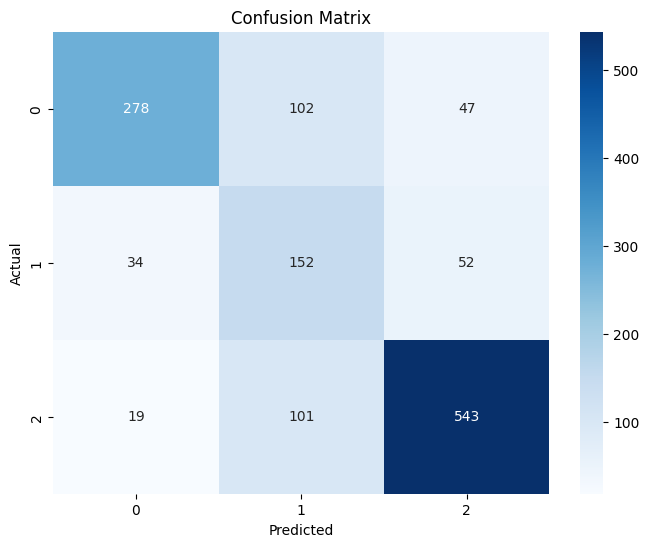

AUC-ROC Score (multiclase): 0.8743


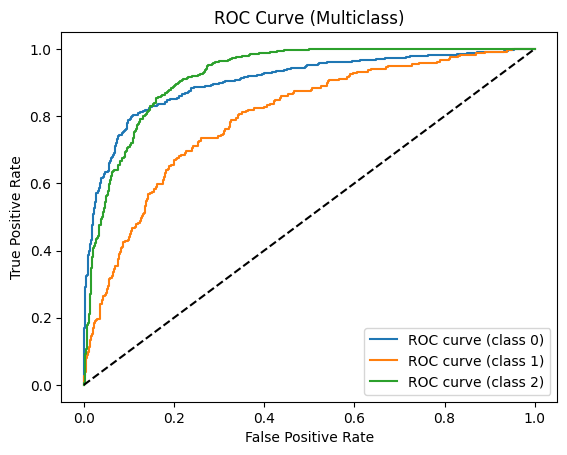

Feature Importances:
Curricular units 2nd sem (approved): 0.2000
Curricular units 1st sem (approved): 0.1543
Curricular units 2nd sem (grade): 0.1302
Curricular units 1st sem (grade): 0.0934
Curricular units 2nd sem (evaluations): 0.0758
Tuition fees up to date: 0.0672
Curricular units 1st sem (evaluations): 0.0511
Age at enrollment: 0.0375
Scholarship holder: 0.0320
Curricular units 2nd sem (enrolled): 0.0281


In [27]:
# Codificamos las variables categóricas
data_encoded = data.copy()
categorical_columns = data_encoded.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Codificamos la variable objetivo
target_encoder = LabelEncoder()
data_encoded['Target'] = target_encoder.fit_transform(data_encoded['Target'])

# Excluir las columnas 'Target', 'Target_num', e 'ID' de las variables predictoras
X = data_encoded.drop(columns=['Target', 'Target_num', 'ID'])
y = data_encoded['Target']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definimos el modelo de Random Forest con hiperparámetros ajustados
model = RandomForestClassifier(
    n_estimators=50,         
    max_depth=5,             
    min_samples_leaf=10,     
    class_weight='balanced', 
    random_state=42
)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Evaluamos con validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

# Predecimos y evaluamos en el conjunto de prueba
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hacemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculamos el AUC-ROC para multiclase
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"AUC-ROC Score (multiclase): {roc_auc:.4f}")

# Gráficamos el ROC para cada clase
fpr = {}
tpr = {}
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {target_encoder.classes_[i]})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

# Mostramos la importancia de las variables
importances = model.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")


*__Interpretación de resultados__*:
- Validación Cruzada
  - Cross-Validation Accuracy Scores: Los puntajes de precisión en la validación cruzada van de entre 0.71 a 0.75. Esto indica que el modelo tiene una precisión moderada.
  - Average Cross-Validation Accuracy: La precisión promedio es aproximadamente 0.727, lo cual es moderadamente alto. El modelo ha logrado un buen equilibrio entre rendimiento y generalización.
  
- Reporte de Clasificación
  - Precisión, Recall y F1-Score:
      - Clase 0 (Dropout): Precisión de 0.84, recall de 0.65 y F1-score de 0.73. El modelo clasifica los casos "Dropout" con una precisión razonablemente buena, pero su capacidad para detectar todos los casos (recall) es limitada, con un 65%. Esto indica que el modelo está perdiendo algunos casos de "Dropout", prediciéndolos incorrectamente como otras clases.
      
      - Clase 1 (Graduate): Precisión de 0.43, recall de 0.64 y F1-score de 0.51. La clase "Graduate" tiene el desempeño más bajo en todas las métricas. La precisión de 0.43 indica que menos de la mitad de las predicciones de "Graduate" son correctas, lo que significa que el modelo tiene dificultades para identificar esta clase correctamente.
      
      - Clase 2 (Enrolled): Precisión de 0.85, recall de 0.82 y F1-score de 0.83. La clase "Enrolled" tiene el mejor rendimiento en todas las métricas. Con un recall de 0.82 y una precisión de 0.85, el modelo es bastante bueno para identificar esta clase en particular.

- Exactitud General
  - Exactitud: La exactitud general del modelo es 0.73. Esto significa que el modelo está clasificando correctamente el 73% de los casos en el conjunto de prueba, lo cual es moderado.
  - Macro Average: La media macro de precisión, recall y F1-score están en torno a 0.70, en promedio, el modelo tiene un rendimiento moderado en todas las clases.
  - Weighted Average: La media ponderada de precisión, recall y F1-score está en torno a 0.74, lo cual toma en cuenta el número de instancias en cada clase y proporciona una idea general del rendimiento del modelo.
  
- Matriz de Confusión:  
   - Clase 0 (Dropout): 
     - Predicciones Correctas: 278 casos fueron correctamente clasificados como "Dropout".
     - Falsos Positivos: 19 casos que eran "Enrolled" (Clase 2) fueron incorrectamente clasificados como "Dropout".
     - Falsos Negativos: 149 casos (102 "Graduate" y 47 "Enrolled") que eran realmente "Dropout" fueron clasificados incorrectamente en otras clases.

      El modelo tiene un desempeño moderado en esta clase, ya que hay una cantidad significativa de falsos negativos. Esto indica que el modelo tiende a clasificar algunos casos de "Dropout" como "Graduate" o "Enrolled"

  - Clase 1 (Graduate):
      - Predicciones Correctas: 152 casos fueron correctamente clasificados como "Graduate".
      - Falsos Positivos: 203 casos (102 "Dropout" y 101 "Enrolled") fueron incorrectamente clasificados como "Graduate".
      - Falsos Negativos: 86 casos (34 "Dropout" y 52 "Enrolled") que eran realmente "Graduate" fueron clasificados como otras clases.Errores: Ningún caso fue clasificado incorrectamente.

      La clase "Graduate" tiene el peor desempeño en términos de precisión, ya que hay un gran número de falsos positivos y falsos negativos. El modelo tiende a confundir esta clase con "Dropout" y "Enrolled", lo cual afecta la precisión de la clasificación.
      
  - Clase 2 (Enrolled):
      - Predicciones Correctas: 543 casos fueron correctamente clasificados como "Enrolled".
      - Falsos Positivos: 47 casos que eran "Dropout" fueron incorrectamente clasificados como "Enrolled".
      - Falsos Negativos: 101 casos que eran "Graduate" fueron clasificados incorrectamente como "Enrolled".

      La clase "Enrolled" tiene el mejor desempeño, con el mayor número de predicciones correctas. Sin embargo, todavía hay algunos falsos positivos y negativos, lo que indica que el modelo a veces confunde esta clase con las otras dos.

- AUC-ROC
  - AUC-ROC Score (multiclase): Un puntaje de 0.874 es una métrica de rendimiento global que indica la capacidad del modelo para distinguir entre las tres clases. Un valor de 1 indica una separación perfecta, mientras que 0.5 indica una clasificación aleatoria.
  - Curva ROC: La curva ROC es un gráfico que muestra la relación entre la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos para cada clase.
      - Clase 0 (Dropout, línea azul): La curva ROC para la clase "Dropout" muestra un buen desempeño, acercándose bastante a la esquina superior, lo cual indica una alta tasa de verdaderos positivos y una baja tasa de falsos positivos. Esto sugiere que el modelo es bastante efectivo al clasificar esta clase. 
      - Clase 1 (Graduate, línea naranja): La curva ROC para la clase "Graduate" es la menos pronunciada, indica que el modelo tiene más dificultad para clasificar correctamente esta clase en comparación con las otras.
      - Clase 2 (Enrolled, línea verde): La curva ROC para la clase "Enrolled" tiene un desempeño alto, indica una buena capacidad de clasificación para esta clase.
  - Línea Diagonal (Línea Punteada): Representa un modelo que clasifica aleatoriamente, donde Tasa de Verdaderos Positivos y Tasa de Falsos Positivos son iguales para cada umbral. Cuanto más alejada esté una curva ROC de esta línea, mejor es el rendimiento del modelo. Las curvas de todas las clases están por encima de la línea diagonal, lo cual indica que el modelo tiene un rendimiento significativamente mejor que el azar.

- Importancia de las Características
Indica cuánto contribuye esa variable en las predicciones del modelo.
  - Curricular units 2nd sem (approved): Esta es la característica más importante, con una importancia del 20%. Un buen desempeño en el segundo semestre parece influir significativamente en el resultado final del estudiante.
  - Curricular units 1st sem (approved): La segunda característica más importante, con una importancia del 15.43%.
  - Curricular units 2nd sem (grade): La calificación en el segundo semestre tiene una importancia del 13.02%, lo cual sugiere que, además del número de unidades aprobadas, la calidad del rendimiento en el segundo semestre es clave para predecir el estado del estudiante.
  - Curricular units 1st sem (grade): Similar al segundo semestre, la calificación en el primer semestre también es importante, con un 9.34%. El modelo considera la calidad del desempeño en esas unidades.
  - Curricular units 2nd sem (evaluations): La cantidad de evaluaciones en el segundo semestre es otra variable relevante con 7.58%. Un mayor número de evaluaciones en este semestre podría estar correlacionado con un mayor compromiso y esfuerzo del estudiante, influyendo en su probabilidad de éxito.
  - Tuition fees up to date: El estado de las cuotas de matrícula representa el 6.72% de la importancia. Esto indica que los estudiantes con cuotas al día podrían estar en menor riesgo de deserción, sugiriendo que el factor financiero es relevante en el rendimiento académico o en la decisión de continuar estudiando.
  - Curricular units 1st sem (evaluations): Similar al segundo semestre, el número de evaluaciones en el primer semestre también contribuye a las predicciones del modelo.
  - Age at enrollment: La edad al momento de inscripción tiene una importancia menor de 3.75%, pero aún es relevante. Esto sugiere que la edad podría influir en el estado del estudiante, posiblemente debido a factores de experiencia o responsabilidades adicionales.
  - Scholarship holder: El hecho de ser becado tiene una pequeña importancia en el modelo de 3.2%. Esto podría indicar que los estudiantes con becas tienen un compromiso mayor o un perfil académico que influye en su probabilidad de graduarse o continuar.
  - Curricular units 2nd sem (enrolled): El número de unidades en las que el estudiante está inscrito en el segundo semestre tiene una pequeña importancia de 2.81%, lo cual podría indicar que un número de inscripciones adecuado ayuda a mantener el rendimiento y la retención.

## Prueba de predicción con nuevos inputs

In [28]:
# Ejemplo de nuevos datos de entrada
new_data = pd.DataFrame({
    'Marital status': [1],
    'Application mode': [8],
    'Application order': [2],
    'Course': [3],
    'Daytime/evening attendance': [1],
    'Previous qualification': [1],
    'Nacionality': [1],
    "Mother's qualification": [3],
    "Father's qualification": [2],
    "Mother's occupation": [5],
    "Father's occupation": [7],
    'Displaced': [0],
    'Educational special needs': [0],
    'Debtor': [1],
    'Tuition fees up to date': [0],
    'Gender': [1],
    'Scholarship holder': [1],
    'Age at enrollment': [20],
    'International': [0],
    'Curricular units 1st sem (credited)': [3],
    'Curricular units 1st sem (enrolled)': [5],
    'Curricular units 1st sem (evaluations)': [5],
    'Curricular units 1st sem (approved)': [4],
    'Curricular units 1st sem (grade)': [12],
    'Curricular units 1st sem (without evaluations)':[0],
    'Curricular units 2nd sem (credited)': [3],
    'Curricular units 2nd sem (enrolled)': [5],
    'Curricular units 2nd sem (evaluations)': [5],
    'Curricular units 2nd sem (approved)': [4],
    'Curricular units 2nd sem (grade)': [15],
    'Curricular units 2nd sem (without evaluations)':[0],
    'Unemployment rate':[10.8],
    'Inflation rate':[1.5],
    'GDP':[0.7]

})

# Codificamos solo las columnas presentes en `new_data`
for col, le in label_encoders.items():
    if col in new_data.columns:  
        new_data[col] = le.transform(new_data[col])

# Realizamos la predicción
new_prediction = model.predict(new_data)
new_prediction_prob = model.predict_proba(new_data)

print("Predicción:", target_encoder.inverse_transform(new_prediction))
print("Probabilidades de cada clase:", new_prediction_prob)


Predicción: [2]
Probabilidades de cada clase: [[0.33498935 0.30879187 0.35621877]]


##### ----------------

In [ ]:
import pickle

# Entrena tu modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Guardar el modelo entrenado
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [33]:
from joblib import dump

# Guarda el modelo reentrenado
dump(model, "random_forest_model_updated.pkl")

['random_forest_model_updated.pkl']

In [34]:
from joblib import load

# Cargar el modelo actualizado
model = load("random_forest_model_updated.pkl")


In [ ]:
# Codificadores para las variables categóricas
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["Marital status", "Application mode", 'Application order','Course','Daytime/evening attendance',
                       'Previous qualification','Nacionality',"Mother's qualification","Father's qualification",
                       "Mother's occupation","Father's occupation",'Displaced','Educational special needs','Debtor',
                       'Tuition fees up to date','Gender', 'Scholarship holder','Age at enrollment','International',
                        'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
                        'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                        'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                        'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                        'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                        'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
                        'Unemployment rate','Inflation rate','GDP'] # Cambia según tus columnas
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

# Guardar los codificadores
with open("label_encoders.pkl", "wb") as file:
    pickle.dump(label_encoders, file)

# Codificador para la variable objetivo
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)

with open("target_encoder.pkl", "wb") as file:
    pickle.dump(target_encoder, file)
